In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as welch
from scipy.signal import find_peaks

In [4]:
M_points_signal = 1024
N_number_signals = 1000
Time = 3
fs = M_points_signal/Time

vector_time = np.linspace(0, Time, M_points_signal)


In [5]:
def generate_signal():
    freq1 = 1
    freq2 = 3
    freq3 = 5
    
    omega_0 = 2*np.pi
    
    amplitude1 = 1
    amplitude2 = 1/3
    amplitude3 = 1/5
    
    signal =(amplitude1*np.cos(omega_0*freq1*vector_time) - amplitude2*np.cos(omega_0*freq2*vector_time) + amplitude3*np.cos(omega_0*freq3*vector_time))
    return signal
  

In [6]:
def noise_gaussian(mean, level_noise,size):
    noise= np.random.normal(mean, level_noise, size=M_points_signal)
    return noise

In [7]:
from scipy.signal import welch

def psd_calculate(signal, fs, nperseg):
    freq, Pxx_den = welch(signal, fs=fs, nperseg=nperseg)
    return freq, Pxx_den

In [8]:
signal = generate_signal() 
signal_1 = generate_signal() + noise_gaussian(0, 0.1, M_points_signal)
signal_2 = generate_signal() + noise_gaussian(0, 0.3, M_points_signal)
signal_3 = generate_signal() + noise_gaussian(0, 1, M_points_signal)
signal_4 = generate_signal() + noise_gaussian(0, 3, M_points_signal)

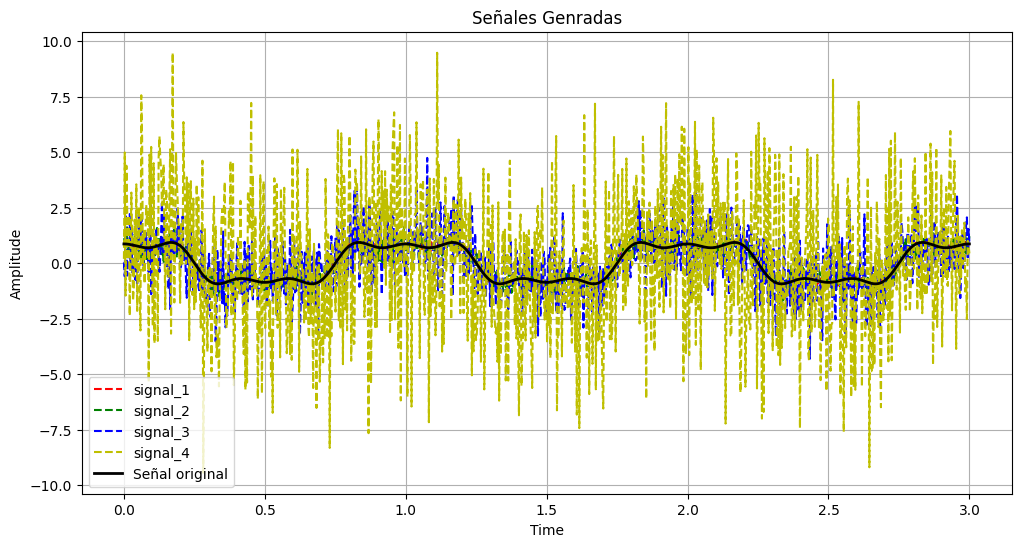

In [9]:
plt.figure(figsize=(12,6))
plt.plot(vector_time, signal_1, label='signal_1', color='r', linestyle='--')
plt.plot(vector_time, signal_2, label='signal_2', color='g', linestyle='--')
plt.plot(vector_time, signal_3, label='signal_3', color='b', linestyle='--')
plt.plot(vector_time, signal_4, label='signal_4', color='y', linestyle='--')   
plt.plot(vector_time, signal, label='Señal original', color='black', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Señales Genradas')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
#psd de las señales creadas  por welch
freq, Pxx_signal = psd_calculate(signal, fs, M_points_signal)
freq1, Pxx_signal_1 = psd_calculate(signal_1, fs, M_points_signal)
freq2, Pxx_signal_2 = psd_calculate(signal_2, fs, M_points_signal)
freq3, Pxx_signal_3 = psd_calculate(signal_3, fs, M_points_signal)
freq4, Pxx_signal_4 = psd_calculate(signal_4, fs, M_points_signal)




C:\Users\Usuario\AppData\Local\Temp\ipykernel_26832\275661754.py:13: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(10**-9,0)


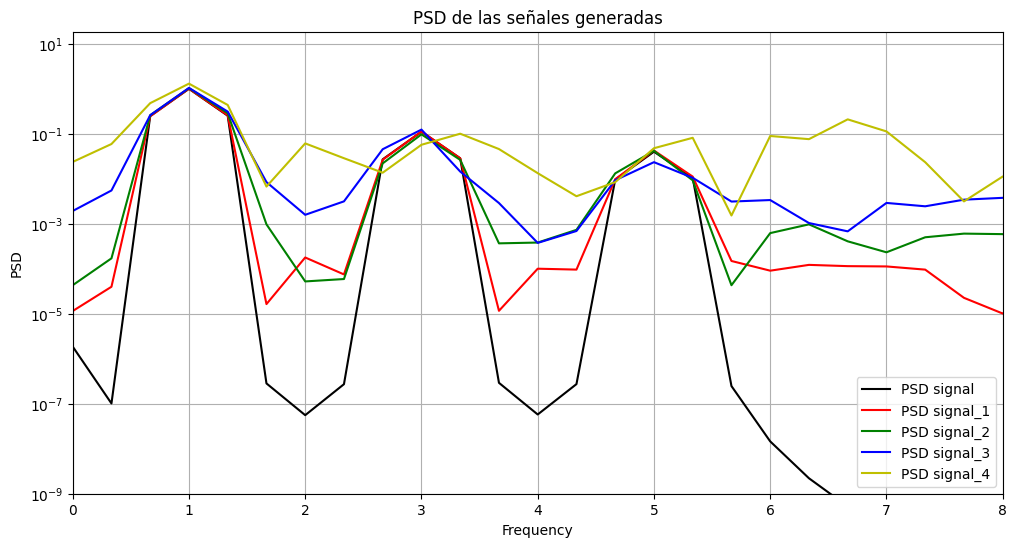

In [11]:
plt.figure(figsize=(12,6))
plt.semilogy(freq, Pxx_signal, label='PSD signal', color='black')
plt.semilogy(freq1, Pxx_signal_1, label='PSD signal_1', color='r')
plt.semilogy(freq2, Pxx_signal_2, label='PSD signal_2', color='g')
plt.semilogy(freq3, Pxx_signal_3, label='PSD signal_3', color='b')
plt.semilogy(freq4, Pxx_signal_4, label='PSD signal_4', color='y')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD de las señales generadas')
plt.legend()
plt.grid(True)
plt.xlim(0,8)
plt.ylim(10**-9,0)
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Preparación de los datos
signals = np.array([signal_1, signal_2, signal_3, signal_4])
psds = np.array([Pxx_signal_1, Pxx_signal_2, Pxx_signal_3, Pxx_signal_4])

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(signals, psds, test_size=0.2, random_state=42)


In [13]:
# Construcción del modelo
model = Sequential()

# Añadir capas al modelo
model.add(Dense(128, input_shape=(M_points_signal,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(Pxx_signal), activation='linear'))  # Salida con la misma cantidad de puntos que la PSD

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.3220 - val_loss: 0.0122
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1554 - val_loss: 0.0082
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1431 - val_loss: 0.0069
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1308 - val_loss: 0.0045
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1059 - val_loss: 0.0038
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1394 - val_loss: 0.0037
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1186 - val_loss: 0.0033
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1955 - val_loss: 0.0029
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0724 - val_loss: 0.0027
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0646 - val_loss: 0.0026
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0474 - val_loss: 0.0026
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.044

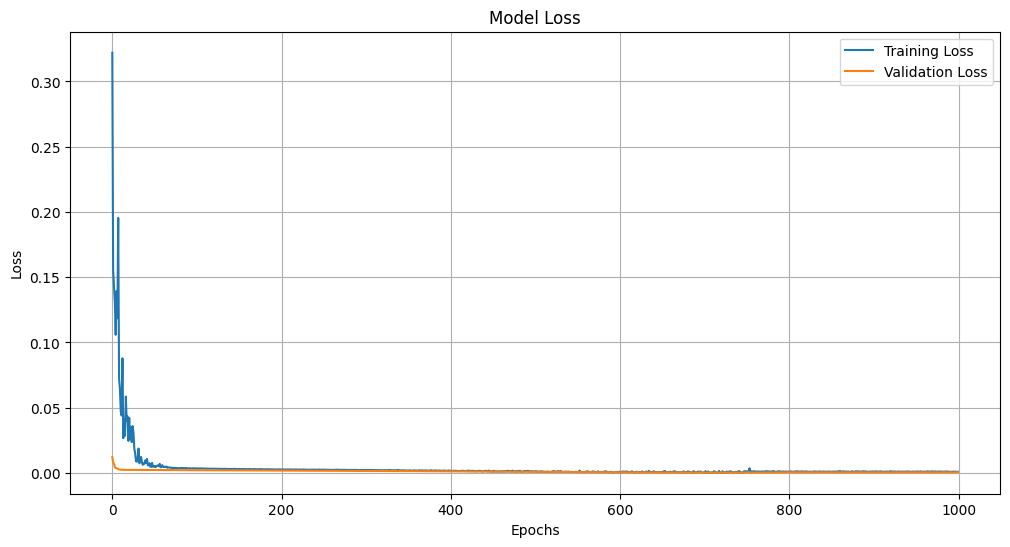

In [14]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))
# Obtener las métricas de rendimiento
loss = history.history['loss']
val_loss = history.history['val_loss']


# Graficar las métricas de rendimiento
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


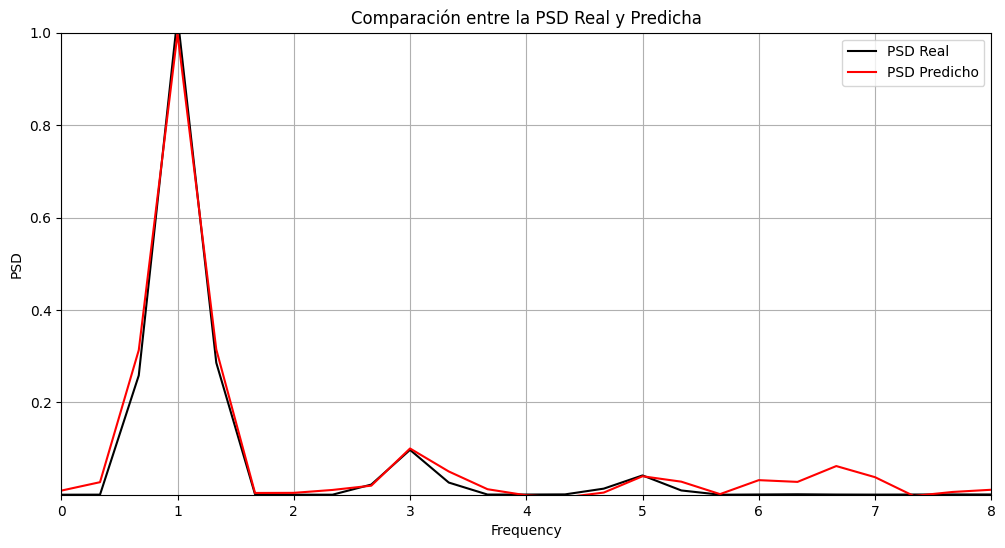

In [15]:

predicted_psd = model.predict(X_test)



plt.figure(figsize=(12, 6))
plt.plot(freq, y_test[0], label='PSD Real', color='black')
plt.plot(freq, predicted_psd[0], label='PSD Predicho', color='red')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('Comparación entre la PSD Real y Predicha')
plt.legend()
plt.grid(True)
plt.xlim(0, 8)
plt.ylim(10**-9, 10**0)  # Ajuste del rango y-lim para visualizar mejor los valores
plt.show()

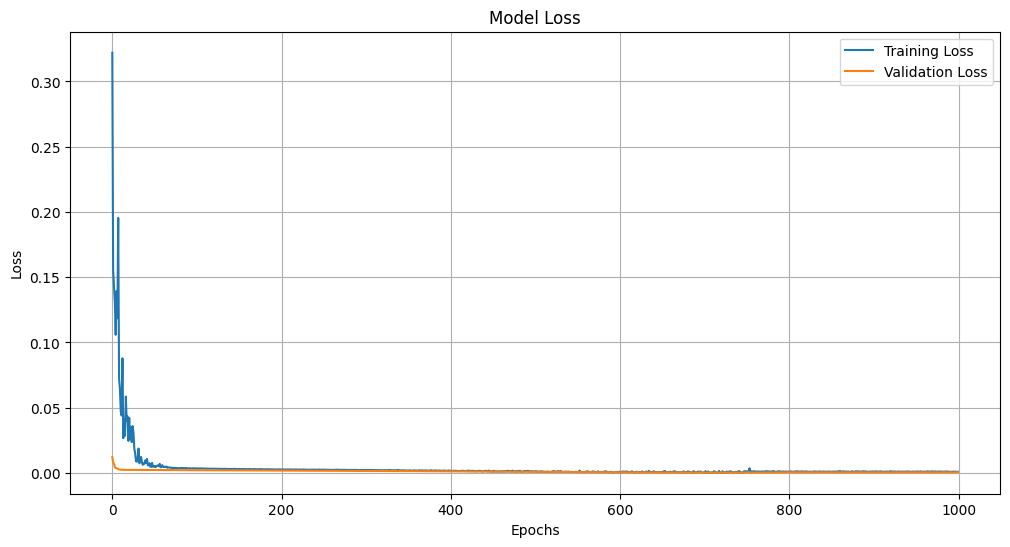

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Frecuencia fundamental detectada: 1.0 Hz


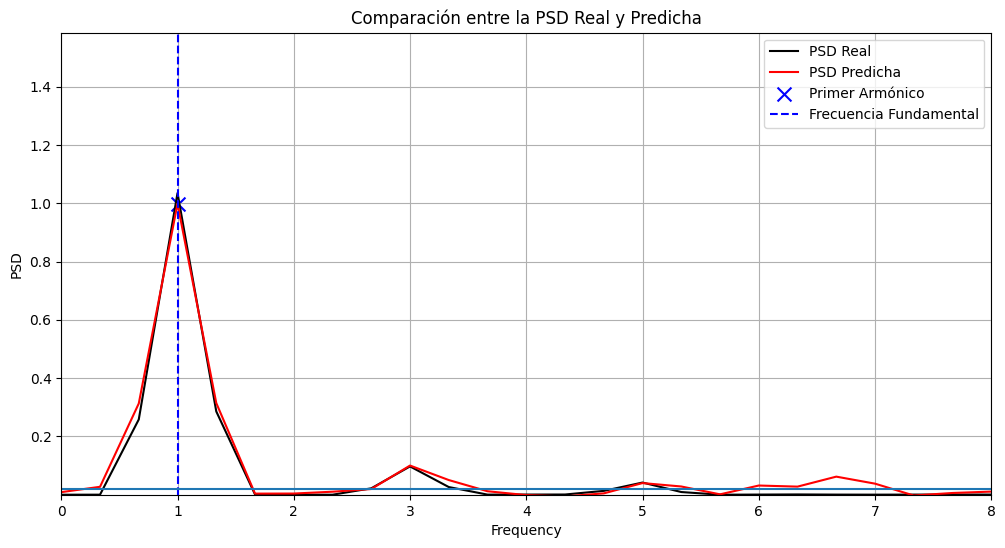

In [44]:


# Verificar que `print` no esté sobrescrito
print = __builtins__.print  # Restablecer `print` a la función incorporada

predicted_psd = model.predict(X_test)

# Establecer un umbral adaptativo basado en la potencia de la señal
umbral_adaptativo = np.mean(predicted_psd[0])  # Ajusta este valor según tus necesidades

# Detección de picos en la PSD predicha
peaks, _ = find_peaks(predicted_psd[0], height=umbral_adaptativo)

# Detección de la frecuencia fundamental
if peaks.size > 0:
    indice_fundamental = peaks[0]
    frecuencia_fundamental = freq[indice_fundamental]
    print(f'Frecuencia fundamental detectada: {frecuencia_fundamental} Hz')
else:
    print('No se detectaron picos que superen el umbral adaptativo.')

# Visualizar la PSD real y la predicha
plt.figure(figsize=(12, 6))
plt.plot(freq, y_test[0], label='PSD Real', color='black')
plt.plot(freq, predicted_psd[0], label='PSD Predicha', color='red')

# Añadir la "x" en el lugar del primer armónico y una línea vertical
if peaks.size > 0:
    plt.scatter(frecuencia_fundamental, predicted_psd[0][indice_fundamental], color='blue', marker='x', s=100, label='Primer Armónico')
    plt.axvline(x=frecuencia_fundamental, color='blue', linestyle='--', label='Frecuencia Fundamental')

plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('Comparación entre la PSD Real y Predicha')
plt.axhline(umbral_adaptativo)
plt.legend()
plt.grid(True)
plt.xlim(0, 8)
plt.ylim(10**-9, 10**0.2)  
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Frecuencia fundamental detectada: 1.0 Hz


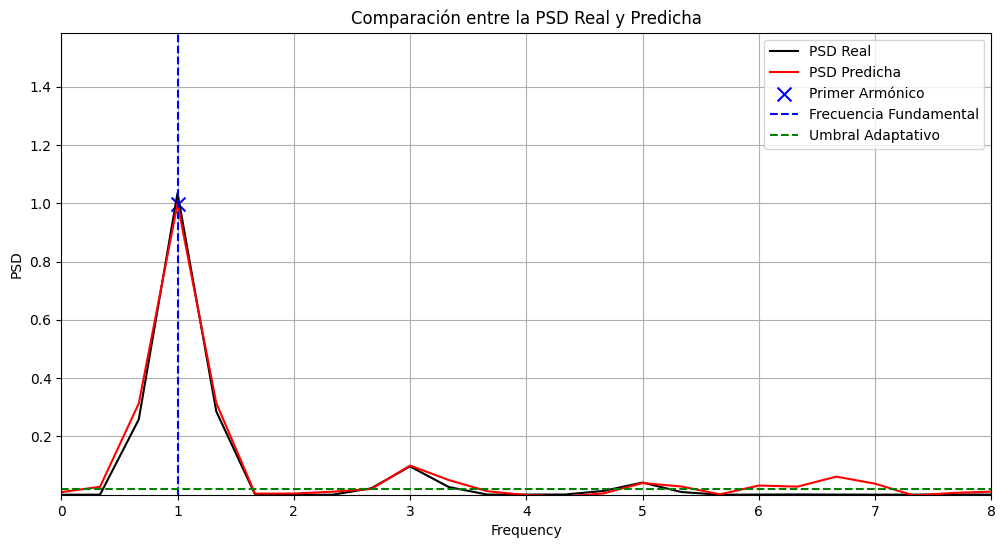

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Verificar que `print` no esté sobrescrito
print = __builtins__.print  # Restablecer `print` a la función incorporada

predicted_psd = model.predict(X_test)

# Detección de picos en la PSD predicha
peaks, properties = find_peaks(predicted_psd[0])

# Establecer un umbral adaptativo basado en el primer pico detectado
if peaks.size > 0:
    indice_fundamental = peaks[0]
    if 'peak_heights' in properties:
        umbral_adaptativo = properties['peak_heights'][0]
    else:
        umbral_adaptativo = np.mean(predicted_psd[0])  # Valor por defecto si no se detectan picos
    frecuencia_fundamental = freq[indice_fundamental]
    print(f'Frecuencia fundamental detectada: {frecuencia_fundamental} Hz')
else:
    umbral_adaptativo = np.mean(predicted_psd[0])  # Valor por defecto si no se detectan picos
    print('No se detectaron picos.')

# Visualizar la PSD real y la predicha
plt.figure(figsize=(12, 6))
plt.plot(freq, y_test[0], label='PSD Real', color='black')
plt.plot(freq, predicted_psd[0], label='PSD Predicha', color='red')

# Añadir la "x" en el lugar del primer armónico y una línea vertical
if peaks.size > 0:
    plt.scatter(frecuencia_fundamental, predicted_psd[0][indice_fundamental], color='blue', marker='x', s=100, label='Primer Armónico')
    plt.axvline(x=frecuencia_fundamental, color='blue', linestyle='--', label='Frecuencia Fundamental')

plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('Comparación entre la PSD Real y Predicha')
plt.axhline(umbral_adaptativo, color='green', linestyle='--', label='Umbral Adaptativo')
plt.legend()
plt.grid(True)
plt.xlim(0, 8)
plt.ylim(10**-9, 10**0.2)  
plt.show()